Gender Submission

In [1]:
import pandas as pd

file_csv = 'gender_submission.csv'
df = pd.read_csv(file_csv)

file_xlsx = 'gender_submission.xlsx'
df.to_excel(file_xlsx, index=False)

print(f"File berhasil dikonversi menjadi {file_xlsx}.")

File berhasil dikonversi menjadi gender_submission.xlsx.


In [2]:
df = pd.read_excel(file_xlsx)

print("Jumlah missing values per kolom:")
print(df.isnull().sum())

df.fillna(df.mean(numeric_only=True), inplace=True)

df = pd.get_dummies(df, drop_first=True)

print("Data setelah preprocessing:")
print(df.head())

Jumlah missing values per kolom:
PassengerId    0
Survived       0
dtype: int64
Data setelah preprocessing:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1



Model: Logistic Regression
Accuracy: 0.60
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


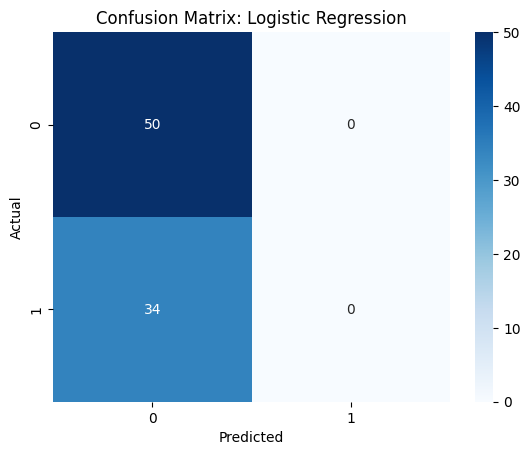


Model: kNN
Accuracy: 0.62
Precision: 0.56
Recall: 0.26
F1-Score: 0.36


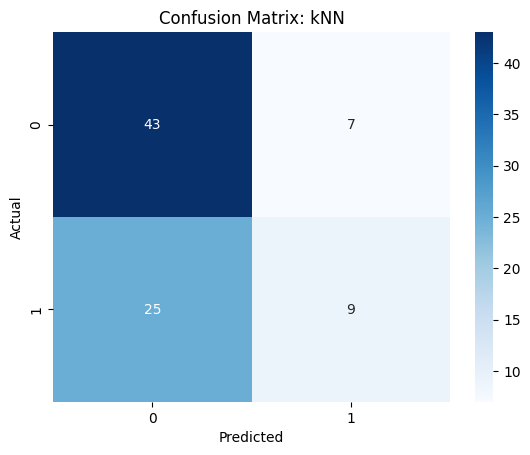


Model: SVM
Accuracy: 0.60
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


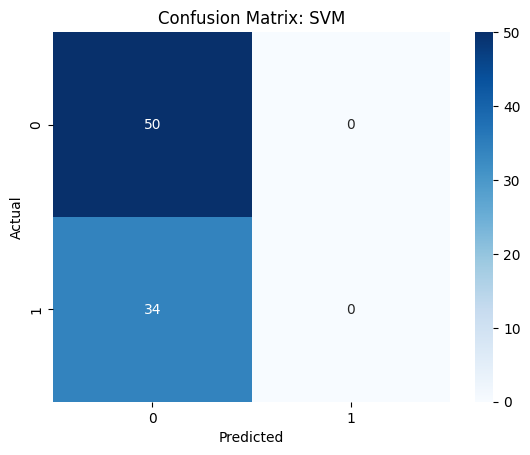

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


 -

Test dan Train

In [9]:
import pandas as pd

train_csv_path = "/content/train.csv"
test_csv_path = "/content/test.csv"

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

train_xlsx_path = "/content/train.xlsx"
test_xlsx_path = "/content/test.xlsx"
train_data.to_excel(train_xlsx_path, index=False)
test_data.to_excel(test_xlsx_path, index=False)

print(f"File CSV berhasil dikonversi ke XLSX:\n- Train: {train_xlsx_path}\n- Test: {test_xlsx_path}")

File CSV berhasil dikonversi ke XLSX:
- Train: /content/train.xlsx
- Test: /content/test.xlsx


In [10]:
from sklearn.preprocessing import LabelEncoder

for col in ['Age', 'Fare']:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)

for col in ['Embarked', 'Cabin']:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

label_enc = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_data[col] = label_enc.fit_transform(train_data[col])
    test_data[col] = label_enc.transform(test_data[col])

train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

print("Preprocessing selesai.")

Preprocessing selesai.


<ipython-input-10-5ae3c44a3ffb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
<ipython-input-10-5ae3c44a3ffb>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_valid)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_valid)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} ===")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score : {f1_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

evaluate_model(y_valid, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_valid, y_pred_knn, "kNN")
evaluate_model(y_valid, y_pred_svm, "SVM")



=== Logistic Regression ===
Accuracy : 0.8101
Precision: 0.7857
Recall   : 0.7432
F1-Score : 0.7639
Confusion Matrix:
[[90 15]
 [19 55]]

=== kNN ===
Accuracy : 0.7039
Precision: 0.6842
Recall   : 0.5270
F1-Score : 0.5954
Confusion Matrix:
[[87 18]
 [35 39]]

=== SVM ===
Accuracy : 0.7821
Precision: 0.7536
Recall   : 0.7027
F1-Score : 0.7273
Confusion Matrix:
[[88 17]
 [22 52]]



=== Logistic Regression ===
Accuracy : 0.8101
Precision: 0.7857
Recall   : 0.7432
F1-Score : 0.7639
Confusion Matrix:
[[90 15]
 [19 55]]


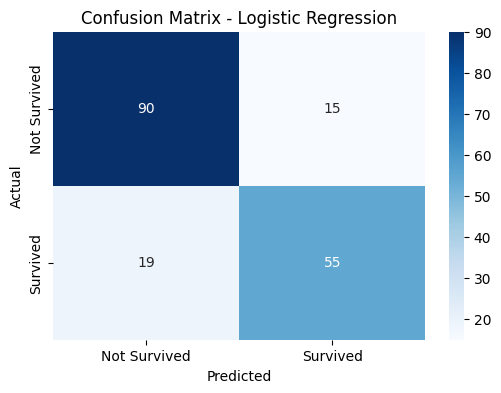


=== kNN ===
Accuracy : 0.7039
Precision: 0.6842
Recall   : 0.5270
F1-Score : 0.5954
Confusion Matrix:
[[87 18]
 [35 39]]


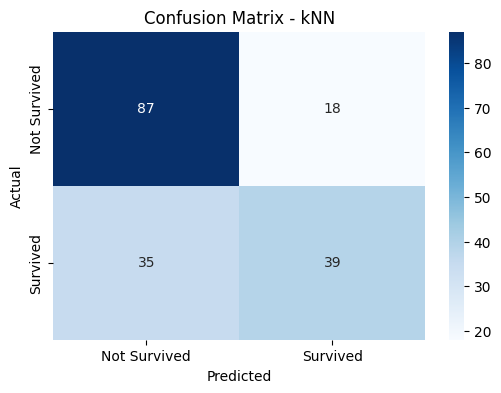


=== SVM ===
Accuracy : 0.7821
Precision: 0.7536
Recall   : 0.7027
F1-Score : 0.7273
Confusion Matrix:
[[88 17]
 [22 52]]


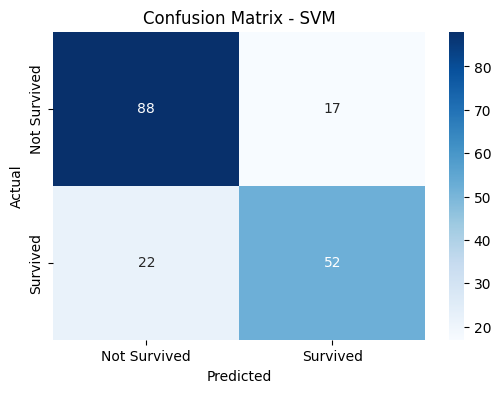

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model(y_valid, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_valid, y_pred_log_reg, "Logistic Regression")

evaluate_model(y_valid, y_pred_knn, "kNN")
plot_confusion_matrix(y_valid, y_pred_knn, "kNN")

evaluate_model(y_valid, y_pred_svm, "SVM")
plot_confusion_matrix(y_valid, y_pred_svm, "SVM")
